Импортируем необходимые библиотеки

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

Загружаем данные

In [2]:
data = pd.read_csv("data.txt", sep=';')

In [3]:
data.head()

,DATA_TYPE,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_BRANCH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_ENGINE_POWER,VEHICLE_IN_CREDIT,VEHICLE_SUM_INSURED,POLICY_INTERMEDIARY,INSURER_GENDER,POLICY_CLM_N,POLICY_CLM_GLT_N,POLICY_PRV_CLM_N,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE
0,TRAIN,1,1,1,1,39,1,Москва,51,12,Land Rover,Discovery,245.0,0,1283202.0,856,F,0,0,N,N,1,0,0,0.0,0,0,0.0,Тульская,-1.00
1,TRAIN,2,1,1,1,50,5,Москва,35,7,Opel,Zafira,140.0,0,453000.0,N,M,0,0,0,0,1,1,0,0.0,0,4,0.0,Москва,-0.05
2,TRAIN,3,1,1,1,52,6,Москва,41,6,Kia,Soul,129.0,0,647718.0,N,F,0,0,1L,1L,0,0,0,0.0,0,1,12518.0,Московская,-0.07
3,TRAIN,4,1,1,1,50,5,Москва,36,12,Citroen,C-Crosser,170.0,0,757795.0,N,M,0,0,0,0,1,1,0,0.0,0,6,15000.0,Москва,0.05
4,TRAIN,5,1,1,0,52,6,Санкт-Петербург,42,5,Renault,Logan,102.0,0,604500.0,171,F,0,0,N,N,0,0,0,0.0,0,0,50000.0,Ленинградская,0.17


Проверим тип данных по каждому столбцу и наличие пропусков

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96605 entries, 0 to 96604
Data columns (total 30 columns):
DATA_TYPE                        96605 non-null object
POLICY_ID                        96605 non-null int64
POLICY_BEGIN_MONTH               96605 non-null int64
POLICY_END_MONTH                 96605 non-null int64
POLICY_IS_RENEWED                96605 non-null int64
POLICY_SALES_CHANNEL             96605 non-null int64
POLICY_SALES_CHANNEL_GROUP       96605 non-null int64
POLICY_BRANCH                    96605 non-null object
POLICY_MIN_AGE                   96605 non-null int64
POLICY_MIN_DRIVING_EXPERIENCE    96605 non-null int64
VEHICLE_MAKE                     96605 non-null object
VEHICLE_MODEL                    96605 non-null object
VEHICLE_ENGINE_POWER             96605 non-null float64
VEHICLE_IN_CREDIT                96605 non-null int64
VEHICLE_SUM_INSURED              96605 non-null float64
POLICY_INTERMEDIARY              96605 non-null object
INSURER_GENDER    

In [5]:
data.isnull().sum()

DATA_TYPE                        0
POLICY_ID                        0
POLICY_BEGIN_MONTH               0
POLICY_END_MONTH                 0
POLICY_IS_RENEWED                0
POLICY_SALES_CHANNEL             0
POLICY_SALES_CHANNEL_GROUP       0
POLICY_BRANCH                    0
POLICY_MIN_AGE                   0
POLICY_MIN_DRIVING_EXPERIENCE    0
VEHICLE_MAKE                     0
VEHICLE_MODEL                    0
VEHICLE_ENGINE_POWER             0
VEHICLE_IN_CREDIT                0
VEHICLE_SUM_INSURED              0
POLICY_INTERMEDIARY              0
INSURER_GENDER                   0
POLICY_CLM_N                     0
POLICY_CLM_GLT_N                 0
POLICY_PRV_CLM_N                 0
POLICY_PRV_CLM_GLT_N             0
CLIENT_HAS_DAGO                  0
CLIENT_HAS_OSAGO                 0
POLICY_COURT_SIGN                0
CLAIM_AVG_ACC_ST_PRD             0
POLICY_HAS_COMPLAINTS            0
POLICY_YEARS_RENEWED_N           0
POLICY_DEDUCT_VALUE              0
CLIENT_REGISTRATION_

Всего 30 признаков, в 12 из них присутствуют строковые значения или категориальные данные, их необходимо будеи перевести в числовой формат. Пропуски в данных отсутсвуют.

Посчитаем количество уникальных значений для каждого признака

In [6]:
data.nunique()

DATA_TYPE                            2
POLICY_ID                        96605
POLICY_BEGIN_MONTH                  12
POLICY_END_MONTH                    12
POLICY_IS_RENEWED                    2
POLICY_SALES_CHANNEL                63
POLICY_SALES_CHANNEL_GROUP           8
POLICY_BRANCH                        2
POLICY_MIN_AGE                      68
POLICY_MIN_DRIVING_EXPERIENCE      112
VEHICLE_MAKE                        83
VEHICLE_MODEL                      549
VEHICLE_ENGINE_POWER               347
VEHICLE_IN_CREDIT                    2
VEHICLE_SUM_INSURED              44638
POLICY_INTERMEDIARY               1406
INSURER_GENDER                       2
POLICY_CLM_N                         7
POLICY_CLM_GLT_N                     7
POLICY_PRV_CLM_N                     7
POLICY_PRV_CLM_GLT_N                 7
CLIENT_HAS_DAGO                      2
CLIENT_HAS_OSAGO                     2
POLICY_COURT_SIGN                    2
CLAIM_AVG_ACC_ST_PRD               709
POLICY_HAS_COMPLAINTS    

## Разведочный анализ данных

Проверим распределение классов искомой величины POLICY_IS_RENEWED. В задание сказано, что в тестовой выборке все значения обнулены, поэтому исключаем из общего датафрейма тестовые объекты:

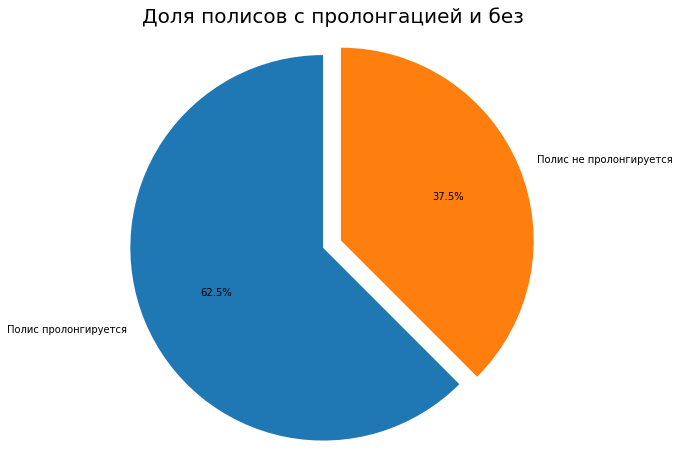

In [7]:
labels = 'Полис пролонгируется', 'Полис не пролонгируется'
sizes = [data['POLICY_IS_RENEWED'][(data['POLICY_IS_RENEWED']==1) & (data['DATA_TYPE'] =='TRAIN')].count(), data['POLICY_IS_RENEWED'][(data['POLICY_IS_RENEWED']==0) & (data['DATA_TYPE'] =='TRAIN')].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title("Доля полисов с пролонгацией и без", size = 20)
plt.show()

По вышеуказанном графику видно, что в 37,5% случаев пролонгация полисов не происходит. Проанализируем взаимосвязи признаков с прогнозируемым параметром.

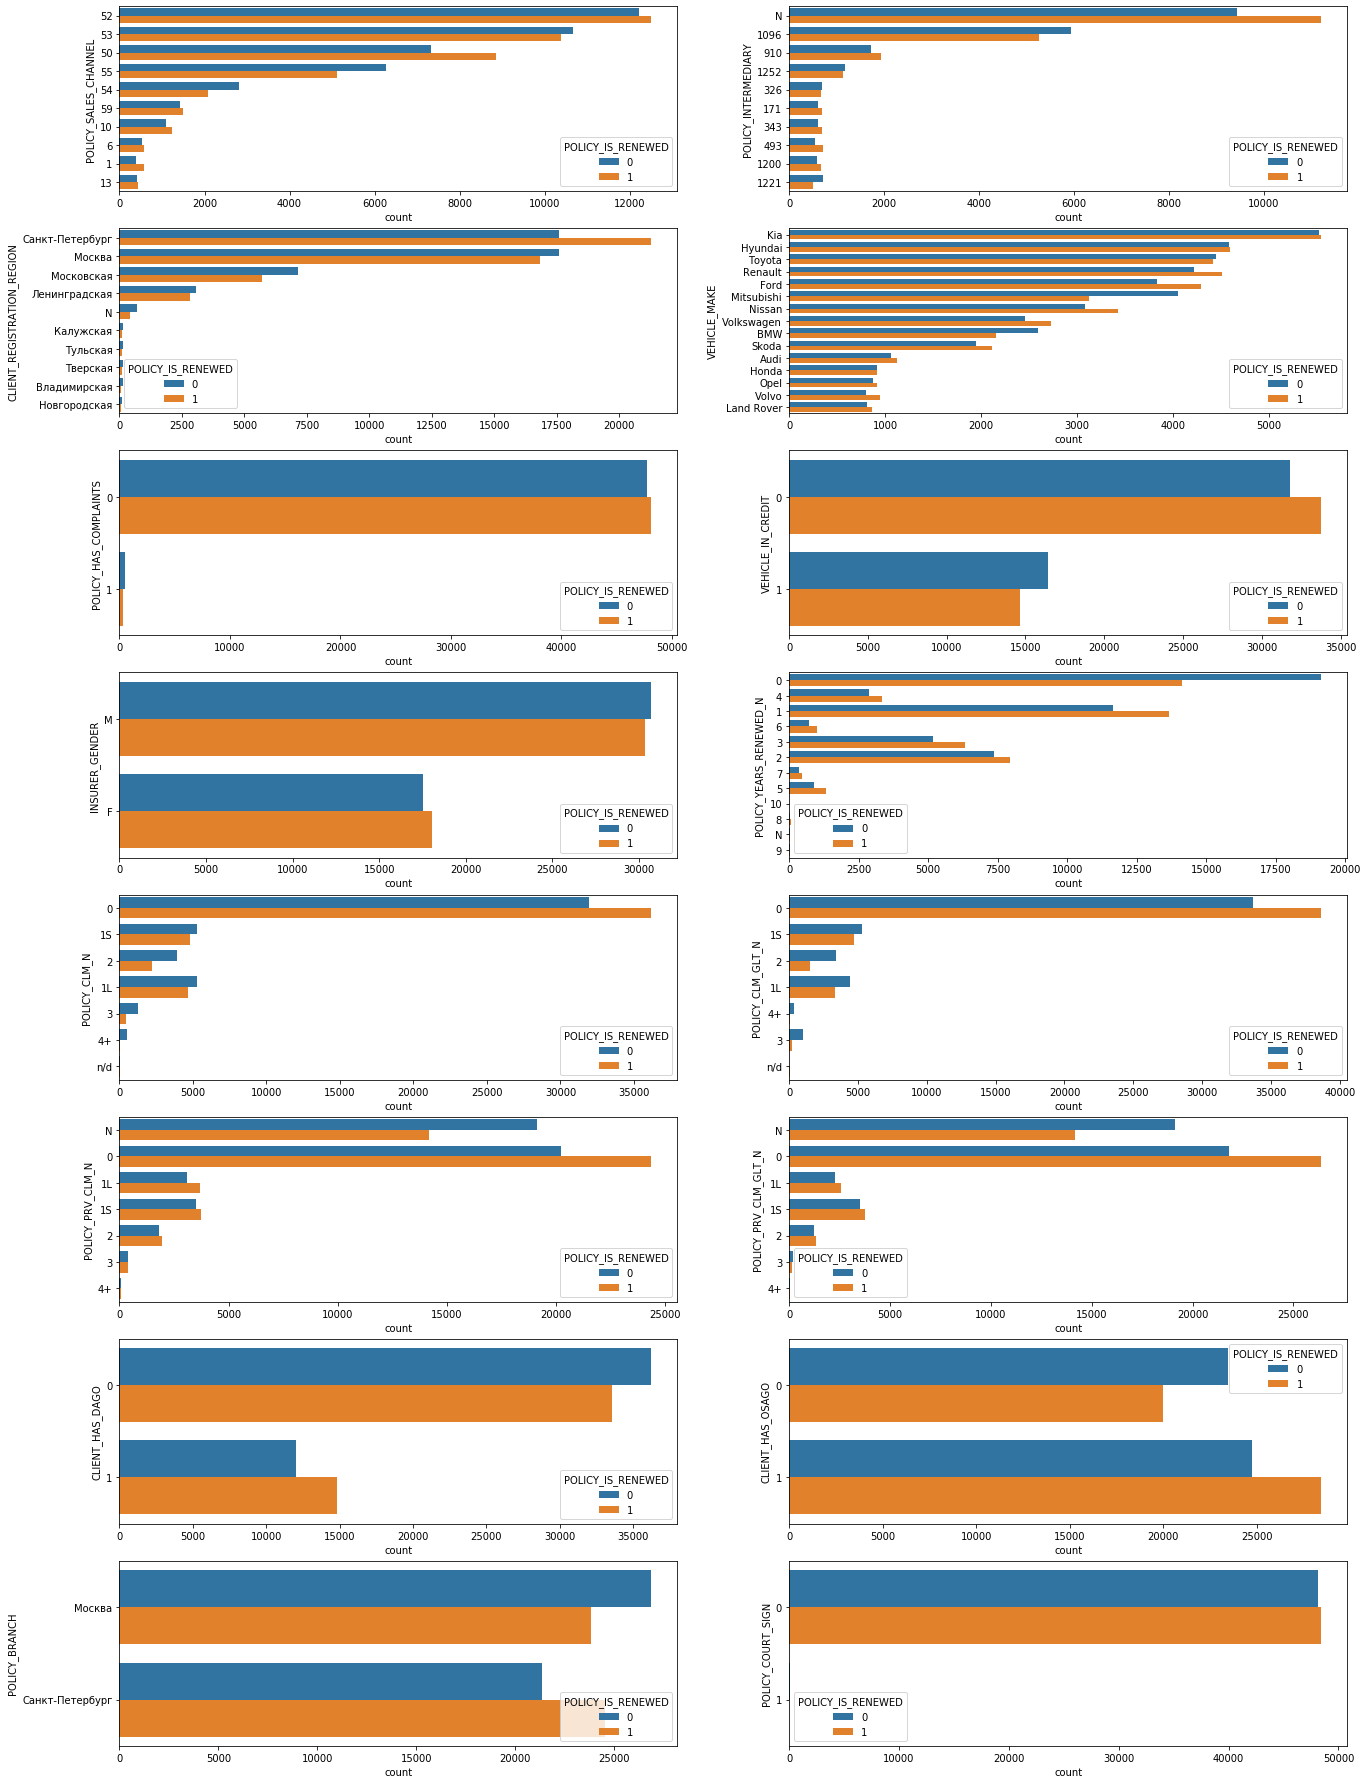

In [8]:
fig, axarr = plt.subplots(8, 2, figsize=(22, 32))
sns.countplot(y='POLICY_SALES_CHANNEL', hue = 'POLICY_IS_RENEWED',
              data = data, order=data.POLICY_SALES_CHANNEL.value_counts().head(10).index, ax=axarr[0][0])
sns.countplot(y='POLICY_INTERMEDIARY', hue = 'POLICY_IS_RENEWED',
              data = data, order = data.POLICY_INTERMEDIARY.value_counts().head(10).index, ax=axarr[0][1])
sns.countplot(y='CLIENT_REGISTRATION_REGION', hue = 'POLICY_IS_RENEWED',
              data = data, order=data.CLIENT_REGISTRATION_REGION.value_counts().head(10).index, ax=axarr[1][0])
sns.countplot(y='VEHICLE_MAKE', hue = 'POLICY_IS_RENEWED',
              data = data, order = data.VEHICLE_MAKE.value_counts().head(15).index, ax=axarr[1][1])
sns.countplot(y='POLICY_HAS_COMPLAINTS', hue = 'POLICY_IS_RENEWED',data = data, ax=axarr[2][0])
sns.countplot(y='VEHICLE_IN_CREDIT', hue = 'POLICY_IS_RENEWED', data = data, ax=axarr[2][1])
sns.countplot(y='INSURER_GENDER', hue = 'POLICY_IS_RENEWED',
              data = data, order = data.INSURER_GENDER.value_counts().head(10).index, ax=axarr[3][0])
sns.countplot(y='POLICY_YEARS_RENEWED_N', hue = 'POLICY_IS_RENEWED',data = data, ax=axarr[3][1])
sns.countplot(y='POLICY_CLM_N', hue = 'POLICY_IS_RENEWED',data = data, ax=axarr[4][0])
sns.countplot(y='POLICY_CLM_GLT_N', hue = 'POLICY_IS_RENEWED',data = data, ax=axarr[4][1])
sns.countplot(y='POLICY_PRV_CLM_N', hue = 'POLICY_IS_RENEWED',data = data, ax=axarr[5][0])
sns.countplot(y='POLICY_PRV_CLM_GLT_N', hue = 'POLICY_IS_RENEWED',data = data, ax=axarr[5][1])
sns.countplot(y='CLIENT_HAS_DAGO', hue = 'POLICY_IS_RENEWED',data = data, ax=axarr[6][0])
sns.countplot(y='CLIENT_HAS_OSAGO', hue = 'POLICY_IS_RENEWED',data = data, ax=axarr[6][1])
sns.countplot(y='POLICY_BRANCH', hue = 'POLICY_IS_RENEWED',data = data, ax=axarr[7][0])
sns.countplot(y='POLICY_COURT_SIGN', hue = 'POLICY_IS_RENEWED',data = data, ax=axarr[7][1])

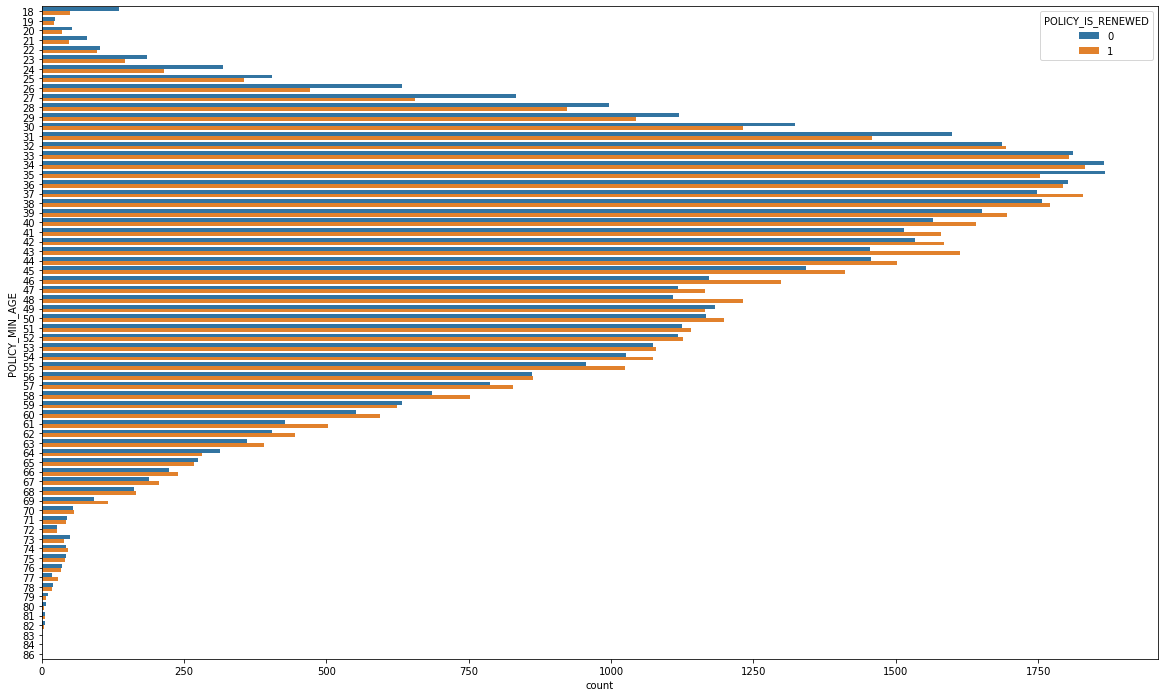

In [9]:
plt.figure(figsize=(20, 12))
sns.countplot(y='POLICY_MIN_AGE', hue = 'POLICY_IS_RENEWED',data = data)

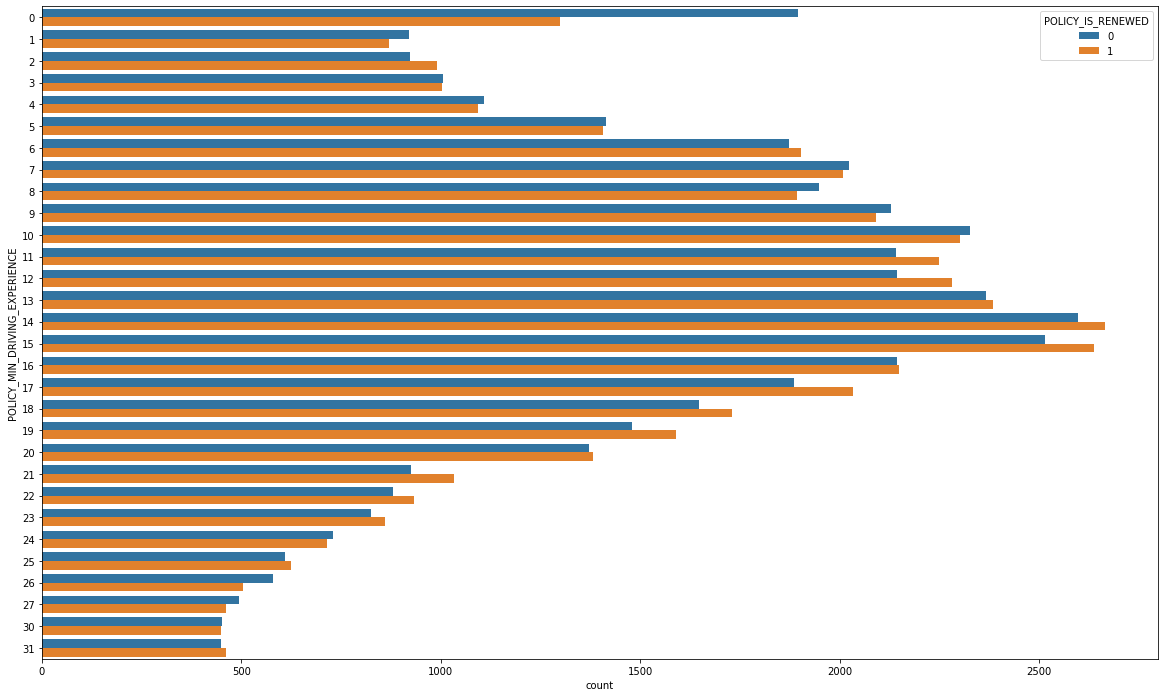

In [10]:
plt.figure(figsize=(20, 12))
sns.countplot(y='POLICY_MIN_DRIVING_EXPERIENCE', hue = 'POLICY_IS_RENEWED',data = data, order = sorted(data.POLICY_MIN_DRIVING_EXPERIENCE.value_counts().head(30).index.to_list()))

Посмотрим на распределение оставшихся признаков

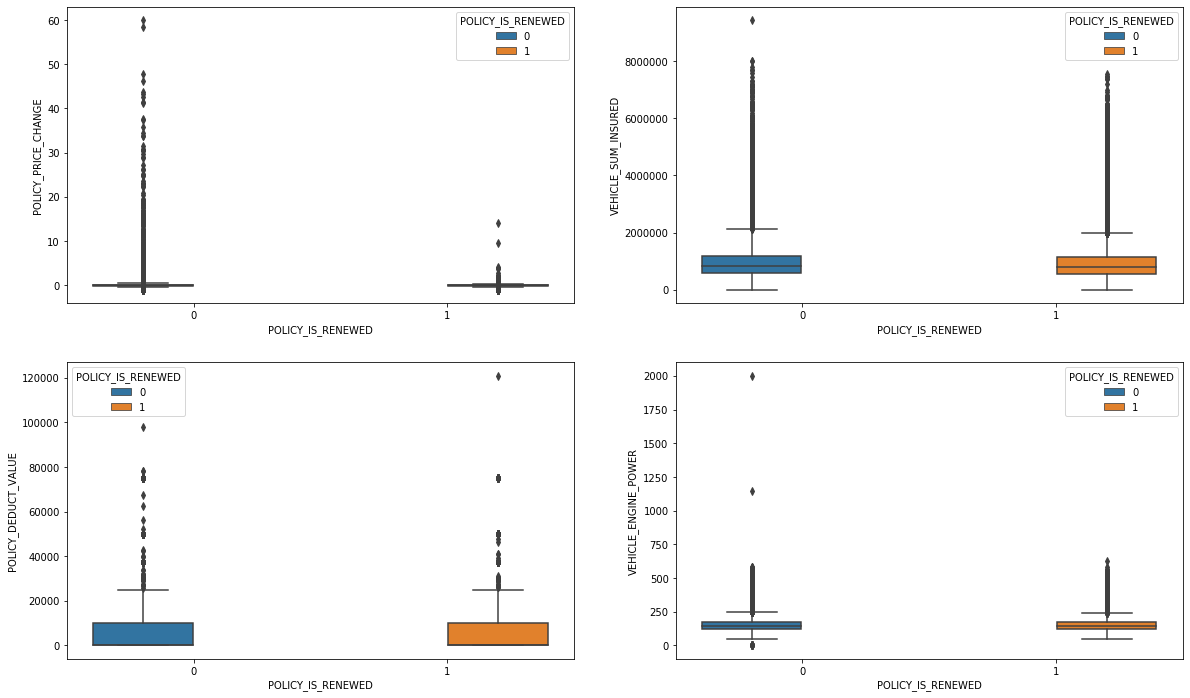

In [11]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.boxplot(y='POLICY_PRICE_CHANGE',x = 'POLICY_IS_RENEWED', hue = 'POLICY_IS_RENEWED',data = data, ax=axarr[0][0])
sns.boxplot(y='VEHICLE_SUM_INSURED',x = 'POLICY_IS_RENEWED', hue = 'POLICY_IS_RENEWED',data = data, ax=axarr[0][1])
sns.boxplot(y='POLICY_DEDUCT_VALUE',x = 'POLICY_IS_RENEWED', hue = 'POLICY_IS_RENEWED',data = data, ax=axarr[1][0])
sns.boxplot(y='VEHICLE_ENGINE_POWER',x = 'POLICY_IS_RENEWED', hue = 'POLICY_IS_RENEWED',data = data, ax=axarr[1][1])

**Краткие выводы:**\
1) Прослеживается тенденция, что люди молодого возраста (до 35 лет) более склонны к смене страховой компании. Клиенты старше 35 лет наоборот более лояльны и чаще пролонгирует полис.\
2) Клиенты с нулевым стажем более вероятно не будут пролонгировать полис.\
3) Лояльность клиента увеличивается с увеличением длительности пролонгирации полиса.\
4) Стоит обратить внимание на 55 и 54 каналы продаж, а также на посредников 1096 и 1226, по ним отток клиентов выделяется на фоне остальных значений признаков.\
5) В Санкт-Петербурге клиенты более лояльные, чем в Москве, Московской и Ленинградской областях. \
6) По маркам автомобилей наиболее не лояльны владельцы Mitsubishi. Возможно имеет смысл обзвонить их отдельно и выяснить, что их не устраивает.\
7) Вероятность непролонгации увеличивается с увеличением страховых случаев по вине клиента. При значениях 3 и выше вероятность оттока увеличивается в разы.

## Обработка данных

Часть признаков являются категориальными, закодируем их в числовые значения используя LabelEncoder из пакета sklearn.preprocessing. Сохраним словари кодирования, для дальнейшей индентификации значений признаков.

In [12]:
from sklearn.utils import shuffle

In [13]:
from sklearn.preprocessing import LabelEncoder

#VEHICLE_MAKE labeling
VEHICLE_MAKE_ENCODER = LabelEncoder()
data['VEHICLE_MAKE'] = VEHICLE_MAKE_ENCODER.fit_transform(data['VEHICLE_MAKE'])
VEHICLE_MAKE_mapping = dict(zip(VEHICLE_MAKE_ENCODER.classes_, VEHICLE_MAKE_ENCODER.transform(VEHICLE_MAKE_ENCODER.classes_)))

#VEHICLE_MODEL labeling
VEHICLE_MODEL_ENCODER = LabelEncoder()
data['VEHICLE_MODEL'] = VEHICLE_MODEL_ENCODER.fit_transform(data['VEHICLE_MODEL'])
VEHICLE_MODEL_mapping = dict(zip(VEHICLE_MODEL_ENCODER.classes_, VEHICLE_MODEL_ENCODER.transform(VEHICLE_MODEL_ENCODER.classes_)))

#POLICY_BRANCH labeling
POLICY_BRANCH_ENCODER = LabelEncoder()
data['POLICY_BRANCH'] = POLICY_BRANCH_ENCODER.fit_transform(data['POLICY_BRANCH'])
POLICY_BRANCH_mapping = dict(zip(POLICY_BRANCH_ENCODER.classes_, POLICY_BRANCH_ENCODER.transform(POLICY_BRANCH_ENCODER.classes_)))


#INSURER_GENDER labeling
INSURER_GENDER_ENCODER = LabelEncoder()
data['INSURER_GENDER'] = INSURER_GENDER_ENCODER.fit_transform(data['INSURER_GENDER'])
INSURER_GENDER_mapping = dict(zip(INSURER_GENDER_ENCODER.classes_, INSURER_GENDER_ENCODER.transform(INSURER_GENDER_ENCODER.classes_)))


#POLICY_CLM_N labeling
POLICY_CLM_N_ENCODER = LabelEncoder()
data['POLICY_CLM_N'] = POLICY_CLM_N_ENCODER.fit_transform(data['POLICY_CLM_N'])
POLICY_CLM_N_mapping = dict(zip(POLICY_CLM_N_ENCODER.classes_, POLICY_CLM_N_ENCODER.transform(POLICY_CLM_N_ENCODER.classes_)))

#POLICY_CLM_GLT_N labeling
POLICY_CLM_GLT_N_ENCODER = LabelEncoder()
data['POLICY_CLM_GLT_N'] = POLICY_CLM_GLT_N_ENCODER.fit_transform(data['POLICY_CLM_GLT_N'])
POLICY_CLM_GLT_N_mapping = dict(zip(POLICY_CLM_GLT_N_ENCODER.classes_, POLICY_CLM_GLT_N_ENCODER.transform(POLICY_CLM_GLT_N_ENCODER.classes_)))

#POLICY_PRV_CLM_N labeling
POLICY_PRV_CLM_N_ENCODER = LabelEncoder()
data['POLICY_PRV_CLM_N'] = POLICY_PRV_CLM_N_ENCODER.fit_transform(data['POLICY_PRV_CLM_N'])
POLICY_PRV_CLM_N_mapping = dict(zip(POLICY_PRV_CLM_N_ENCODER.classes_, POLICY_PRV_CLM_N_ENCODER.transform(POLICY_PRV_CLM_N_ENCODER.classes_)))

#POLICY_PRV_CLM_GLT_N labeling
POLICY_PRV_CLM_GLT_N_ENCODER = LabelEncoder()
data['POLICY_PRV_CLM_GLT_N'] = POLICY_PRV_CLM_GLT_N_ENCODER.fit_transform(data['POLICY_PRV_CLM_GLT_N'])
POLICY_PRV_CLM_GLT_N_mapping = dict(zip(POLICY_PRV_CLM_GLT_N_ENCODER.classes_, POLICY_PRV_CLM_GLT_N_ENCODER.transform(POLICY_PRV_CLM_GLT_N_ENCODER.classes_)))

#POLICY_YEARS_RENEWED_N labeling
POLICY_YEARS_RENEWED_N_ENCODER = LabelEncoder()
data['POLICY_YEARS_RENEWED_N'] = POLICY_YEARS_RENEWED_N_ENCODER.fit_transform(data['POLICY_YEARS_RENEWED_N'])
POLICY_YEARS_RENEWED_N_mapping = dict(zip(POLICY_YEARS_RENEWED_N_ENCODER.classes_, POLICY_YEARS_RENEWED_N_ENCODER.transform(POLICY_YEARS_RENEWED_N_ENCODER.classes_)))

#CLIENT_REGISTRATION_REGION labeling
CLIENT_REGISTRATION_REGION_ENCODER = LabelEncoder()
data['CLIENT_REGISTRATION_REGION'] = CLIENT_REGISTRATION_REGION_ENCODER.fit_transform(data['CLIENT_REGISTRATION_REGION'])
CLIENT_REGISTRATION_REGION_mapping = dict(zip(CLIENT_REGISTRATION_REGION_ENCODER.classes_, CLIENT_REGISTRATION_REGION_ENCODER.transform(CLIENT_REGISTRATION_REGION_ENCODER.classes_)))

data['POLICY_INTERMEDIARY'] = data['POLICY_INTERMEDIARY'].replace('N', 0).astype('int64')

#признак VEHICLE_SUM_INSURED(страховая сумма) разобъем на 5 категорий
bins = np.linspace(min(data['VEHICLE_SUM_INSURED']), max(data['VEHICLE_SUM_INSURED']), 5)
group_names = [0,1,2,3]
data['VEHICLE_SUM_INSURED'] = pd.cut(data['VEHICLE_SUM_INSURED'], bins, labels=group_names, include_lowest=True)
data['VEHICLE_SUM_INSURED'] = data['VEHICLE_SUM_INSURED'].astype('int64')

Разобъем датафрейм на тренировочную и тестовую выборки. Удалим номера полисов (POLICY_ID) в тренировочной выборке, так они не имеют полезной информации

In [14]:
train = data[data['DATA_TYPE'] =='TRAIN']
test = data[data['DATA_TYPE'] == 'TEST ']
train = train.drop(columns=['DATA_TYPE','POLICY_ID'])
test = test.drop(columns=['DATA_TYPE'])


Выделим в тренировочной выборке искомую величину и признаковое пространство

In [15]:
X = train.drop(columns='POLICY_IS_RENEWED')
y = train.POLICY_IS_RENEWED

Начнем подбор модели

In [16]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

Проверим через cross_validate модели LogisticRegression, RandomForestClassifier, DecisionTreeClassifier, KNeighborsClassifier и XGBClassifier с базовыми настройками

In [17]:
#LogisticRegression
scores = cross_validate(LogisticRegression(), X, y, scoring= 'accuracy',
                         cv=5, return_train_score=True)
print(scores['test_score'].mean())

0.6632734215688669


In [18]:
#RandomForestClassifier
scores = cross_validate(RandomForestClassifier(), X, y, scoring= 'accuracy',
                         cv=5, return_train_score=True)
print(scores['test_score'].mean())

0.6713734148256388


In [19]:
#DecisionTreeClassifier
scores = cross_validate(DecisionTreeClassifier(), X, y, scoring= 'accuracy',
                         cv=5, return_train_score=True)
print(scores['test_score'].mean())

0.61755410581089


In [20]:
#KNeighborsClassifier
scores = cross_validate(KNeighborsClassifier(), X, y, scoring= 'accuracy',
                         cv=5, return_train_score=True)
print(scores['test_score'].mean())

0.5955275822496826


In [21]:
#XGBClassifier
scores = cross_validate(XGBClassifier(), X, y, scoring= 'accuracy',
                         cv=5, return_train_score=True)
print(scores['test_score'].mean())

0.7094320955786306


Лучше всего себя показали с базовыми настройками RandomForestClassifier и XGBClassifier. Подберем оптимальные параметры используя GridSearchCV. Настройка проводится не по всем параметрам, так как время выполнения тестового задания ограничено, а это самая времязатратная задача.

In [24]:
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)

In [25]:
#Подбор гиперпараметров для RandomForestClassifier()
param_grid = {'max_depth': [5, 10, 20, 30],'n_estimators':[50,100,150]}
RFC_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, refit=True, verbose=0)
RFC_grid.fit(X,y)
best_model(RFC_grid)

0.7141085431550118
{'max_depth': 20, 'n_estimators': 150}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [27]:
#Подбор гиперпараметров для XGBClassifier()
param_grid = {'max_depth': [5, 10, 15, 20],'n_estimators':[50,100,150]}
XGB_grid = GridSearchCV(XGBClassifier(), param_grid, cv=3, refit=True, verbose=0)
XGB_grid.fit(X,y)
best_model(XGB_grid)

0.7181391863784929
{'max_depth': 5, 'n_estimators': 150}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


## Построение и оценка модели

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=40)

In [29]:
#RandomForestClassifier()

RFC = RandomForestClassifier(max_depth = 20, n_estimators = 150)
RFC.fit(x_train,y_train)
y_predic_RFC = RFC.predict(x_test)
y_predic_RFC_proba = RFC.predict_proba(x_test)
print(roc_auc_score(y_test,y_predic_RFC))

0.6501461599716953


In [30]:
print(classification_report(y_test,y_predic_RFC))

              precision    recall  f1-score   support

           0       0.71      0.40      0.51      5913
           1       0.71      0.90      0.79      9569

    accuracy                           0.71     15482
   macro avg       0.71      0.65      0.65     15482
weighted avg       0.71      0.71      0.69     15482



In [31]:
#XGBClassifier()

XGB = XGBClassifier(max_depth = 5, n_estimators = 150)
XGB.fit(x_train,y_train)
y_predic_XGB = XGB.predict(x_test)
print(roc_auc_score(y_test,y_predic_XGB))

0.6587600183148212


In [32]:
print(classification_report(y_test,y_predic_XGB))

              precision    recall  f1-score   support

           0       0.71      0.43      0.53      5913
           1       0.72      0.89      0.79      9569

    accuracy                           0.71     15482
   macro avg       0.71      0.66      0.66     15482
weighted avg       0.71      0.71      0.69     15482



Посмотрим какие признаки классификаторы считают важными

In [33]:
import operator
RFC_FI = dict(zip(X.columns, RFC.feature_importances_))
XGB_FI = dict(zip(X.columns, XGB.feature_importances_))
RFC_FI_sorted = sorted(RFC_FI.items(),key=operator.itemgetter(1),reverse=True)
XGB_FI_sorted = sorted(XGB_FI.items(),key=operator.itemgetter(1),reverse=True)

RandomForestClassifier

In [34]:
RFC_FI_sorted[:15]

[('POLICY_PRICE_CHANGE', 0.17799121557560232),
 ('POLICY_MIN_AGE', 0.07542720243892233),
 ('VEHICLE_ENGINE_POWER', 0.0723953284907416),
 ('POLICY_MIN_DRIVING_EXPERIENCE', 0.07058409012743062),
 ('VEHICLE_MODEL', 0.07039132530815927),
 ('POLICY_INTERMEDIARY', 0.059192794484840876),
 ('VEHICLE_MAKE', 0.050790345590953835),
 ('POLICY_END_MONTH', 0.04151535780460095),
 ('POLICY_BEGIN_MONTH', 0.041263275302172865),
 ('POLICY_SALES_CHANNEL', 0.037618966988344264),
 ('POLICY_CLM_GLT_N', 0.031179360812834254),
 ('POLICY_DEDUCT_VALUE', 0.03112195996892617),
 ('CLIENT_REGISTRATION_REGION', 0.030829030757235375),
 ('CLAIM_AVG_ACC_ST_PRD', 0.030403595911700942),
 ('POLICY_YEARS_RENEWED_N', 0.030241625180998048)]

XGBClassifier

In [35]:
XGB_FI_sorted[:15]

[('POLICY_PRV_CLM_GLT_N', 0.17137995),
 ('POLICY_PRICE_CHANGE', 0.103694856),
 ('POLICY_CLM_GLT_N', 0.08655128),
 ('CLIENT_HAS_OSAGO', 0.074188076),
 ('POLICY_YEARS_RENEWED_N', 0.05885512),
 ('CLIENT_HAS_DAGO', 0.057827167),
 ('CLIENT_REGISTRATION_REGION', 0.04497215),
 ('POLICY_BRANCH', 0.04462879),
 ('POLICY_END_MONTH', 0.0378275),
 ('POLICY_DEDUCT_VALUE', 0.036028765),
 ('POLICY_SALES_CHANNEL', 0.029430417),
 ('VEHICLE_IN_CREDIT', 0.02489684),
 ('POLICY_BEGIN_MONTH', 0.022759797),
 ('POLICY_SALES_CHANNEL_GROUP', 0.021739347),
 ('POLICY_INTERMEDIARY', 0.020104982)]

## Прогнозирование целевого признака

Окончательно будем использовать XGBClassifier.

In [36]:
test = test.drop(columns='POLICY_IS_RENEWED')
y_predict = XGB.predict(test.drop(columns='POLICY_ID'))
y_predict_proba = pd.DataFrame(XGB.predict_proba(test.drop(columns='POLICY_ID')))
test['POLICY_IS_RENEWED'] = y_predict
test['POLICY_IS_RENEWED_PROBABILITY'] = y_predict_proba[1].values
test

,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_BRANCH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_ENGINE_POWER,VEHICLE_IN_CREDIT,VEHICLE_SUM_INSURED,POLICY_INTERMEDIARY,INSURER_GENDER,POLICY_CLM_N,POLICY_CLM_GLT_N,POLICY_PRV_CLM_N,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE,POLICY_IS_RENEWED,POLICY_IS_RENEWED_PROBABILITY
9,10,2,2,53,6,1,56,37,61,345,102.0,0,0,224,1,0,0,0,0,0,1,0,0.0,0,1,15000.0,58,-0.04,1,0.842250
11,12,1,1,53,6,0,53,35,30,430,197.0,1,0,1221,1,0,0,0,0,0,0,0,0.0,0,1,0.0,41,0.06,1,0.729281
12,13,1,1,54,6,0,30,8,68,470,170.0,0,0,352,0,2,2,0,0,1,1,0,2.0,0,1,0.0,41,-0.29,1,0.645880
21,22,1,1,52,6,1,61,25,68,271,122.0,0,0,515,1,3,3,0,0,0,0,0,0.0,0,4,0.0,36,0.43,0,0.437789
36,37,12,12,1,4,1,36,18,52,59,140.0,0,0,55,1,0,0,0,0,1,1,0,0.0,0,8,0.0,58,-0.01,1,0.842699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96573,96574,2,2,53,6,1,38,13,3,374,224.0,0,1,110,0,2,2,6,6,1,1,0,0.0,0,0,0.0,58,-0.08,1,0.761765
96576,96577,1,1,53,6,1,32,11,3,373,170.0,0,0,1241,0,0,0,6,6,0,1,0,0.0,0,0,0.0,58,0.04,0,0.481800
96585,96586,2,2,52,6,1,53,25,23,236,161.0,1,0,493,1,0,0,1,1,1,1,0,0.0,0,3,0.0,58,-0.13,1,0.881219
96594,96595,2,2,52,6,0,36,19,35,545,286.0,1,0,910,1,2,2,0,0,0,1,0,0.0,0,1,0.0,42,0.01,1,0.746357


### Сохраняем результат

In [37]:
result = pd.DataFrame()
result['POLICY_ID'] = test['POLICY_ID']
result['POLICY_IS_RENEWED'] = test['POLICY_IS_RENEWED']
result['POLICY_IS_RENEWED_PROBABILITY'] = test['POLICY_IS_RENEWED_PROBABILITY']
result.to_csv('result.csv',index=False)